# Retirement Planner

---

## Environment Setup

In [1]:
# Import libraries and dependencies
# 99.99% of answers came from solved refresher notebooks from Instructor GS, advice from Instructor AN, advice from Instructor KS, and Tutor, Ms. LT

import numpy as np
import math
import pandas as pd
import os
import pylab
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [2]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = "PKE4FKSDHOCM0N1M1VER"
alpaca_secret_key = "HHyP/LCO5NAJXlX03s9Tdlo9Vx5rWJMtlUkX3T36"

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Get all Assets
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
tradeable

[Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NASDAQ',
     'id': '013c1653-577e-4267-8956-3c9d0aa0eca2',
     'marginable': True,
     'name': 'ATA Creativity Global American Depositary Shares',
     'shortable': False,
     'status': 'active',
     'symbol': 'AACG',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NASDAQ',
     'id': '66120c4a-e8d8-46d9-a044-efb573abbc7a',
     'marginable': True,
     'name': 'Atlantic American Corporation Common Stock',
     'shortable': True,
     'status': 'active',
     'symbol': 'AAME',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NYSE',
     'id': 'f0dc3427-b0cc-440f-9835-4f8fd05f8598',
     'marginable': True,
     'name': "Aaron's, Inc.",
     'shortable': True,
     'status': 'active',
     'symbol': 'AAN',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': False

In [5]:
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])

# Display the first 10 asset tickers
display(asset_info_df.head(10))

symbol
0   AACG
1   AACH
2   AAME
3    AAN
4   ACER
5   ACES
6  ACEVU
7  ACGLP
8   ACHC
9   ACHV

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [6]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago. use corrrect dayes
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [7]:
# Display sample data
df.head()

#was simulated_price_df.head()

AGG     SPY
                             close   close
time                                      
2019-01-02 00:00:00-05:00  106.585  249.89
2019-01-03 00:00:00-05:00  107.020  244.46
2019-01-04 00:00:00-05:00  106.695  252.41
2019-01-07 00:00:00-05:00  106.470  254.40
2019-01-08 00:00:00-05:00  106.420  256.65

In [8]:
daily_returns = df.pct_change()
daily_returns.head()

AGG       SPY
                              close     close
time                                         
2019-01-02 00:00:00-05:00       NaN       NaN
2019-01-03 00:00:00-05:00  0.004081 -0.021730
2019-01-04 00:00:00-05:00 -0.003037  0.032521
2019-01-07 00:00:00-05:00 -0.002109  0.007884
2019-01-08 00:00:00-05:00 -0.000470  0.008844

In [9]:

avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg

avg_daily_return_spy

0.0010397627326754729

---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [10]:
# Calculate the daily roi for the stocks
daily_roi = df.pct_change()

#daily_returns = sp_500_set.pct_change()


# Display sample data
# daily_roi.sample()

In [11]:
daily_roi.head()
# algo_returns_set.dropna(inplace=True)
#daily_roi.dropna(inplace=True)

AGG       SPY
                              close     close
time                                         
2019-01-02 00:00:00-05:00       NaN       NaN
2019-01-03 00:00:00-05:00  0.004081 -0.021730
2019-01-04 00:00:00-05:00 -0.003037  0.032521
2019-01-07 00:00:00-05:00 -0.002109  0.007884
2019-01-08 00:00:00-05:00 -0.000470  0.008844

In [12]:
daily_roi.dropna(inplace=True)

In [13]:
daily_roi.head()

AGG       SPY
                              close     close
time                                         
2019-01-03 00:00:00-05:00  0.004081 -0.021730
2019-01-04 00:00:00-05:00 -0.003037  0.032521
2019-01-07 00:00:00-05:00 -0.002109  0.007884
2019-01-08 00:00:00-05:00 -0.000470  0.008844
2019-01-09 00:00:00-05:00  0.000564  0.004130

In [14]:
#std_dev_daily_return_jnj = daily_returns.std()['JNJ']['close']
#std_dev_daily_return_mu = daily_returns.std()['MU']['close']
#std_dev_daily_return_mu
#avg_daily_return_jnj = daily_returns.mean()['JNJ']['close']
#avg_daily_return_mu = daily_returns.mean()['MU']['close']
#avg_daily_return_mu

avg_daily_agg = daily_roi.mean()["AGG"]['close']
avg_daily_spy = daily_roi.mean()["SPY"]['close']

In [15]:
std_daily_agg = daily_roi.std()['AGG']['close']
std_daily_spy = daily_roi.std()['SPY']['close']
std_daily_spy
std_daily_agg
#stated that this is the volatitly instead

0.0020886019741764646

In [16]:
# Compute daily volatility
# how do I do this? 
# daily volatility is the square root of the variance
# from https://www.wallstreetmojo.com/volatility-formula/#:~:text=The%20formula%20for%20daily%20volatility,of%20a%20daily%20stock%20price.&text=Further%2C%20the%20annualized%20volatility%20formula,a%20square%20root%20of%20252.

#berkshire_covariance = combination_frame["BERKSHIRE HATHAWAY INC"].cov(combination_frame["S&P"])
#berkshire_variance = combination_frame["S&P"].var()
#berkshire_beta = berkshire_covariance/berkshire_variance
#print(berkshire_covariance)
#print(berkshire_variance)
#berkshire_beta


variance_AGG = daily_roi["AGG"].var()
variance_SPY = daily_roi["SPY"].var()
vol_AGG = math.sqrt(variance_AGG)
vol_SPY = math.sqrt(variance_SPY)
print(vol_AGG)
print(vol_SPY)

0.0020886019741764646
0.007821228920771257


In [17]:
# Save the last day's closing price
#jnj_last_price = df['JNJ']['close'][-1]
# mu_last_price = df['MU']['close'][-1]
last_price_AGG = df['AGG']['close'][-1]
last_price_SPY = df['SPY']['close'][-1]

In [18]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
last_price_AGG = df['AGG']['close'][-1]
last_price_SPY = df['SPY']['close'][-1]



monte_carlo = pd.DataFrame()

In [19]:
simulated_price_df = pd.DataFrame()
portfol_cumul_ret = pd.DataFrame()

In [20]:
# Run the Monte Carlo Simulation

# Set number of simulations and coin flips
#num_simulations = 5
#num_flips = 10

# Set a list object acting as a coin: heads or tails
#coin = ["heads", "tails"]

# Set probability of events
#probability = [0.5, 0.5]

# Create an empty DataFrame to hold simulation results
#monte_carlo = pd.DataFrame()
#avg_daily_agg = daily_roi.mean()["AGG"]['close']
# std_daily_agg = daily_roi.std()['AGG']['close']


for item in range(number_simulations):
    simulated_agg_prices = [last_price_AGG]
    simulated_spy_prices = [last_price_SPY]
    for neweritem in range(number_records):
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_agg, std_daily_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_spy, std_daily_spy))
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)

    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    #simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    simulated_daily_returns = simulated_price_df.pct_change()
    weights = [.6, .4]
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfol_cumul_ret[item] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

portfol_cumul_ret.head()
    
    
     # Calculate the daily returns of simulated prices
  #  simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
 #   weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
 #   portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
 #   portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
# portfolio_cumulative_returns.head()


0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.000733  0.999711  0.998237  1.003406  1.008394  0.997497  0.999663   
2  1.006858  1.002968  1.001195  0.997723  1.007478  0.996019  0.996897   
3  1.006372  1.002684  1.001856  0.997834  1.006229  0.992278  1.000063   
4  1.011327  1.004633  1.004339  1.001541  1.010242  0.993664  1.003101   

        7         8         9    ...       490       491       492       493  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.007944  1.000837  0.996925  ...  1.001650  0.994702  1.002252  1.001714   
2  1.002471  1.000313  0.996703  ...  1.004336  0.996974  1.003697  1.004215   
3  0.997846  1.000294  1.003228  ...  1.004999  0.993499  1.004921  1.007249   
4  0.993691  1.002659  1.004776  ...  1.003652  0.995609  1.005106  1.004128   

        494       495       496       497       498       499  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  0.997403  1.002493  1.000484  1.003433  0.999304  0.996259  
2  0.998266  0.994749  1.001138  1.002625  0.997998  0.999465  
3  0.994609  0.996293  1.005230  0.999494  1.000129  1.002152  
4  0.996545  0.995421  1.002762  1.001598  0.999738  1.003183  

[5 rows x 500 columns]

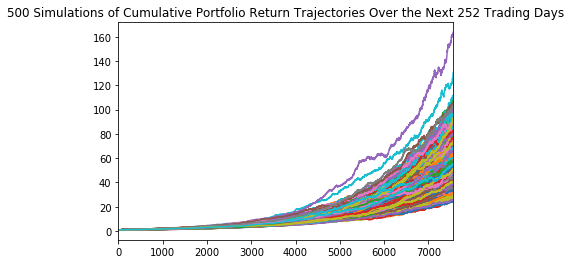

In [21]:
plot_title = f"{item + 1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfol_cumul_ret.plot(legend=None, title=plot_title)

In [22]:

"""

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_jnj_prices = [jnj_last_price]
    simulated_mu_prices = [mu_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_jnj_price = simulated_jnj_prices[-1] * (1 + np.random.normal(avg_daily_return_jnj, std_dev_daily_return_jnj))
        simulated_mu_price = simulated_mu_prices[-1] * (1 + np.random.normal(avg_daily_return_mu, std_dev_daily_return_mu))
        
        # Append the simulated price to the list
        simulated_jnj_prices.append(simulated_jnj_price)
        simulated_mu_prices.append(simulated_mu_price)
    
    # Append the simulated prices of each simulation to DataFrame
    simulated_price_df["JNJ prices"] = pd.Series(simulated_jnj_prices)
    simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()









"""

'\n\n# Initialize empty DataFrame to hold simulated prices for each simulation\nsimulated_price_df = pd.DataFrame()\nportfolio_cumulative_returns = pd.DataFrame()\n\n# Run the simulation of projecting stock prices for the next trading year, `1000` times\nfor n in range(num_simulations):\n\n    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`\n    simulated_jnj_prices = [jnj_last_price]\n    simulated_mu_prices = [mu_last_price]\n    \n    # Simulate the returns for 252 days\n    for i in range(num_trading_days):\n        \n        # Calculate the simulated price using the last price within the list\n        simulated_jnj_price = simulated_jnj_prices[-1] * (1 + np.random.normal(avg_daily_return_jnj, std_dev_daily_return_jnj))\n        simulated_mu_price = simulated_mu_prices[-1] * (1 + np.random.normal(avg_daily_return_mu, std_dev_daily_return_mu))\n        \n        # Append the simulated price to the list\n        simulated_jnj_prices.append(simulat

In [23]:
# Check that the simulation ran successfully
# just put .head

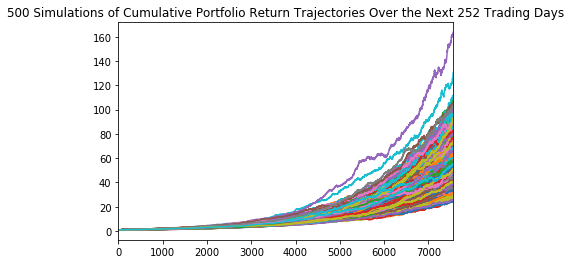

In [24]:
# Visualize the Simulation
plot_title = f"{item + 1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfol_cumul_ret.plot(legend=None, title=plot_title)

In [25]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns = portfol_cumul_ret.iloc[-1, :]
ending_cumulative_returns.head()

0    59.103696
1    53.318476
2    57.228392
3    49.140604
4    56.317272
Name: 7560, dtype: float64

In [26]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
final_cumul_ret = portfol_cumul_ret.iloc[-1, :] 
final_cumul_ret.head() 

0    59.103696
1    53.318476
2    57.228392
3    49.140604
4    56.317272
Name: 7560, dtype: float64

In [27]:
# Display the 90% confidence interval for the ending returns
confidence_interval = final_cumul_ret.quantile(q=[0.05, 0.95])
confidence_interval

0.05    37.092689
0.95    90.877210
Name: 7560, dtype: float64

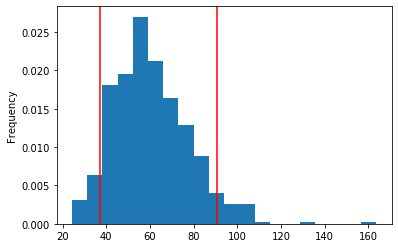

In [28]:
# Visualize the distribution of the ending returns
plt.figure()
final_cumul_ret.plot(kind='hist', density=True, bins=20)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [29]:
# Compute cumulative returns
final_cumul_ret_90 = final_cumul_ret.quantile(.9)
print(f" Expected cumulative returns in thirty years for the ninetieth percentile is $" "{:.2f}".format (final_cumul_ret_90))
final_cumul_ret_50 = final_cumul_ret.quantile(.5)
print(f" Expected cumulative returns in thirty years for the fiftieth percentile is $" "{:.2f}".format (final_cumul_ret_50))
final_cumul_ret_10 = final_cumul_ret.quantile(.1)
print(f" Expected cumulative returns in thirty years for the tenth percentile is $" "{:.2f}".format (final_cumul_ret_10))


 Expected cumulative returns in thirty years for the ninetieth percentile is $82.89
 Expected cumulative returns in thirty years for the fiftieth percentile is $58.85
 Expected cumulative returns in thirty years for the tenth percentile is $40.15


In [30]:
# final_cumul_ret.quantile([.9, .5, .1]) alternate form from Tutor, Ms. LT

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [31]:
# Set initial investment
initializer = 20000

# Compute expected portfolio return
returner_90 = initializer * final_cumul_ret_90
print(f"Expected cumulative returns of twenty thousand dollars for ninetieth percentile is $" "{:.2f}".format(returner_90))

returner_50 = initializer * final_cumul_ret_50
print(f"Expected cumulative returns of twenty thousand dollars for fiftieth percentile is $" "{:.2f}".format(returner_50))


returner_10 = initializer * final_cumul_ret_10
print(f"Expected cumulative returns of twenty thousand dollars for tenth percentile is $" "{:.2f}".format(returner_10))

Expected cumulative returns of twenty thousand dollars for ninetieth percentile is $1657824.27
Expected cumulative returns of twenty thousand dollars for fiftieth percentile is $1177011.45
Expected cumulative returns of twenty thousand dollars for tenth percentile is $803043.04


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [32]:
# Set Plaid's projected income
plaid_projected_income = 6085
plaid_initial = 20000
# Calculate the 4% withdrawal for the ending return as retirement income
#four_percent_income = .04*(plaid_projected_income*final_cumul_ret_10)
#four_percent_income = .04*
#print(f" Returment income Is $" "{: .2f} ".format (four_percent_income) )
# Determine if the retirement income meets or exceeds the current projected income
#print(f" Retirement income is higher than the current projected income")

In [33]:
retirement_income_from_initial = .04 * (plaid_initial*final_cumul_ret_10) # from Ms. LT, Tutor
retirement_income_from_initial

32121.72161768964

In [34]:
retirement_income_from_projected = .04 * (plaid_projected_income*final_cumul_ret_10) # from Ms. LT, Tutor
retirement_income_from_projected

9773.033802182073

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [35]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
investment_augmentation = plaid_initial * 1.5
return_augmentation_90 = .04*investment_augmentation*final_cumul_ret_90
print(f" Retirement Income with a fifty percent increase in the initial investment for the ninetieth percentile is $" "{:.2f}".format (return_augmentation_90))



 Retirement Income with a fifty percent increase in the initial investment for the ninetieth percentile is $99469.46


In [36]:
double_augmentation = plaid_initial * 2
double_augmentation_90 = .04*double_augmentation*final_cumul_ret_90
print(f" Retirement Income with a double of the initial investment for the ninetieth percentile is $" "{:.2f}".format (double_augmentation_90))



 Retirement Income with a double of the initial investment for the ninetieth percentile is $132625.94


In [37]:
triple_aug = plaid_initial * 3
triple_aug_90 = .04*triple_aug*final_cumul_ret_90
print(f" Retirement Income with a triple of the initial investment for the ninetieth percentile is $" "{:.2f}".format (triple_aug_90))


 Retirement Income with a triple of the initial investment for the ninetieth percentile is $198938.91


In [38]:
return_augmentation_50 = .04*investment_augmentation*final_cumul_ret_50
print(f" Retirement Income with a fifty percent increase the initial investment for the fiftieth percentile is $" "{:.2f}".format (return_augmentation_50))


 Retirement Income with a fifty percent increase the initial investment for the fiftieth percentile is $70620.69


In [39]:
double_augmentation = plaid_initial * 2
double_augmentation_50 = .04*double_augmentation*final_cumul_ret_50
print(f" Retirement Income with a double of the initial investment for the fiftieth percentile is $" "{:.2f}".format (double_augmentation_90))



 Retirement Income with a double of the initial investment for the fiftieth percentile is $132625.94


In [40]:
triple_aug = plaid_initial * 3
triple_aug_50 = .04*triple_aug*final_cumul_ret_50
print(f" Retirement Income with a triple of the initial investment for the fiftieth percentile is $" "{:.2f}".format (triple_aug_50))


 Retirement Income with a triple of the initial investment for the fiftieth percentile is $141241.37


In [41]:
return_augmentation_10 = .04*investment_augmentation*final_cumul_ret_10
print(f" Retirement Income with a fifty percent increase in the initial investment for the tenth percentile is $" "{:.2f}".format (return_augmentation_10))

 Retirement Income with a fifty percent increase in the initial investment for the tenth percentile is $48182.58


In [42]:
double_augmentation_10 = .04*double_augmentation*final_cumul_ret_10
print(f" Retirement Income with a double of the initial investment for the tenth percentile is $" "{:.2f}".format (double_augmentation_10))

 Retirement Income with a double of the initial investment for the tenth percentile is $64243.44


In [43]:
triple_aug = plaid_initial * 3
triple_aug_10 = .04*triple_aug*final_cumul_ret_10
print(f" Retirement Income with a triple of the initial investment for the tenth percentile is $" "{:.2f}".format (triple_aug_10))


 Retirement Income with a triple of the initial investment for the tenth percentile is $96365.16


### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [44]:
# Compute projected returns
final_cumul_ret_90 = final_cumul_ret.quantile(.9)
print(f" Expected cumulative returns in thirty years for the ninetieth percentile is $" "{:.2f}".format (final_cumul_ret_90))
final_cumul_ret_50 = final_cumul_ret.quantile(.5)
print(f" Expected cumulative returns in thirty years for the fiftieth percentile is $" "{:.2f}".format (final_cumul_ret_50))
final_cumul_ret_10 = final_cumul_ret.quantile(.1)
print(f" Expected cumulative returns in thirty years for the tenth percentile is $" "{:.2f}".format (final_cumul_ret_10))
# Display sample data


 Expected cumulative returns in thirty years for the ninetieth percentile is $82.89
 Expected cumulative returns in thirty years for the fiftieth percentile is $58.85
 Expected cumulative returns in thirty years for the tenth percentile is $40.15


0.9        0.5        0.1
0      1.000000   1.000000   1.000000
1      1.005064   1.000691   0.996187
2      1.007479   1.001124   0.995073
3      1.009499   1.001942   0.994500
4      1.011608   1.002220   0.994244
5      1.013032   1.002761   0.993142
6      1.014177   1.003721   0.993039
7      1.015053   1.004229   0.992514
8      1.016848   1.004594   0.992403
9      1.017898   1.005176   0.991594
10     1.019760   1.006055   0.991917
11     1.020351   1.006357   0.991938
12     1.021892   1.007214   0.991626
13     1.023287   1.007141   0.991953
14     1.024098   1.008215   0.991779
15     1.024989   1.008538   0.991920
16     1.025696   1.008747   0.991124
17     1.026417   1.009742   0.991508
18     1.028173   1.010275   0.991546
19     1.030426   1.010394   0.992504
20     1.030465   1.010310   0.993233
21     1.031118   1.010691   0.993229
22     1.032037   1.011511   0.993448
23     1.032743   1.011648   0.992917
24     1.035192   1.012280   0.993588
25     1.035811   1.012847   0.992594
26     1.035932   1.013815   0.992195
27     1.036212   1.014044   0.991013
28     1.038210   1.015019   0.992802
29     1.038587   1.014961   0.992750
...         ...        ...        ...
7531  81.285112  58.100397  39.701936
7532  81.185824  58.031258  39.714561
7533  81.180306  58.051056  39.748912
7534  81.486994  58.140584  39.786772
7535  81.275909  58.082349  39.678645
7536  81.456415  58.205415  39.648667
7537  81.435875  58.103624  39.720716
7538  81.605907  58.039344  39.781243
7539  81.603291  58.276337  39.804714
7540  81.825056  58.427730  39.668484
7541  81.837093  58.431587  39.675578
7542  81.641762  58.467491  39.772231
7543  81.606338  58.362383  39.707743
7544  81.509426  58.464643  39.721610
7545  81.597218  58.433977  39.838972
7546  81.837281  58.436072  39.888745
7547  81.870126  58.528978  39.811980
7548  81.732557  58.525906  39.962359
7549  81.741932  58.524333  40.028570
7550  81.868647  58.525623  39.843169
7551  81.952553  58.557802  39.804630
7552  82.197945  58.515688  39.717055
7553  82.201876  58.681247  39.732313
7554  82.311086  58.713486  39.779651
7555  82.264612  58.843233  39.919071
7556  82.232109  58.724823  40.004898
7557  82.442414  58.851165  39.985144
7558  82.294852  58.796091  40.046231
7559  82.845939  58.756318  40.047626
7560  82.891214  58.850572  40.152152

[7561 rows x 3 columns]

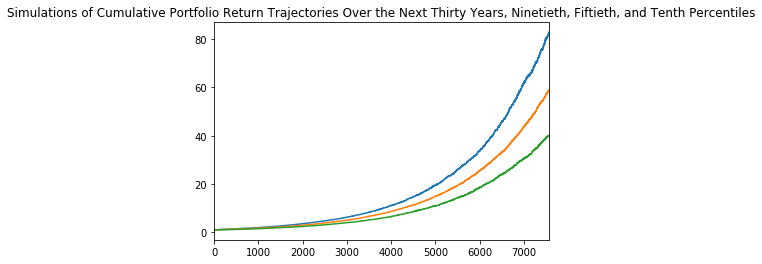

In [45]:
# Plot the cumulative returns over time
plot_title = f"Simulations of Cumulative Portfolio Return Trajectories Over the Next Thirty Years, Ninetieth, Fiftieth, and Tenth Percentiles"
#final_cumul_ret_90.plot(legend=None, title=plot_title)
result = portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T #to flip things, set axis equal to one portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T
result.plot(legend=None, title=plot_title)
result
#result.T.plot(legend=None, title=plot_title)
#result.plot(legend=None, title=plot_title)
# this section came from direct help from Tutor, Ms. LT

0.9           0.5            0.1
0     2.000000e+04  2.000000e+04   20000.000000
1     2.010128e+04  2.001383e+04   19923.748012
2     2.014958e+04  2.002248e+04   19901.466583
3     2.018997e+04  2.003884e+04   19889.996208
4     2.023215e+04  2.004441e+04   19884.872104
5     2.026063e+04  2.005522e+04   19862.845967
6     2.028354e+04  2.007443e+04   19860.777479
7     2.030106e+04  2.008457e+04   19850.283519
8     2.033696e+04  2.009188e+04   19848.067116
9     2.035797e+04  2.010351e+04   19831.871528
10    2.039520e+04  2.012110e+04   19838.333943
11    2.040702e+04  2.012714e+04   19838.750093
12    2.043784e+04  2.014428e+04   19832.514160
13    2.046574e+04  2.014282e+04   19839.066982
14    2.048197e+04  2.016430e+04   19835.585892
15    2.049977e+04  2.017076e+04   19838.409387
16    2.051392e+04  2.017495e+04   19822.476487
17    2.052834e+04  2.019483e+04   19830.153494
18    2.056346e+04  2.020550e+04   19830.915419
19    2.060853e+04  2.020788e+04   19850.083282
20    2.060930e+04  2.020619e+04   19864.664150
21    2.062236e+04  2.021381e+04   19864.584632
22    2.064073e+04  2.023022e+04   19868.959258
23    2.065486e+04  2.023296e+04   19858.341136
24    2.070384e+04  2.024559e+04   19871.753564
25    2.071621e+04  2.025695e+04   19851.876696
26    2.071864e+04  2.027631e+04   19843.898130
27    2.072423e+04  2.028088e+04   19820.258884
28    2.076421e+04  2.030038e+04   19856.033395
29    2.077175e+04  2.029922e+04   19855.002388
...            ...           ...            ...
7531  1.625702e+06  1.162008e+06  794038.714368
7532  1.623716e+06  1.160625e+06  794291.214327
7533  1.623606e+06  1.161021e+06  794978.245229
7534  1.629740e+06  1.162812e+06  795735.448298
7535  1.625518e+06  1.161647e+06  793572.890899
7536  1.629128e+06  1.164108e+06  792973.349574
7537  1.628717e+06  1.162072e+06  794414.323793
7538  1.632118e+06  1.160787e+06  795624.860544
7539  1.632066e+06  1.165527e+06  796094.283743
7540  1.636501e+06  1.168555e+06  793369.685913
7541  1.636742e+06  1.168632e+06  793511.557349
7542  1.632835e+06  1.169350e+06  795444.626435
7543  1.632127e+06  1.167248e+06  794154.868430
7544  1.630189e+06  1.169293e+06  794432.205139
7545  1.631944e+06  1.168680e+06  796779.443398
7546  1.636746e+06  1.168721e+06  797774.895084
7547  1.637403e+06  1.170580e+06  796239.607036
7548  1.634651e+06  1.170518e+06  799247.176640
7549  1.634839e+06  1.170487e+06  800571.392667
7550  1.637373e+06  1.170512e+06  796863.373795
7551  1.639051e+06  1.171156e+06  796092.607494
7552  1.643959e+06  1.170314e+06  794341.102935
7553  1.644038e+06  1.173625e+06  794646.263281
7554  1.646222e+06  1.174270e+06  795593.025798
7555  1.645292e+06  1.176865e+06  798381.429941
7556  1.644642e+06  1.174496e+06  800097.963018
7557  1.648848e+06  1.177023e+06  799702.880757
7558  1.645897e+06  1.175922e+06  800924.611711
7559  1.656919e+06  1.175126e+06  800952.517275
7560  1.657824e+06  1.177011e+06  803043.040442

[7561 rows x 3 columns]

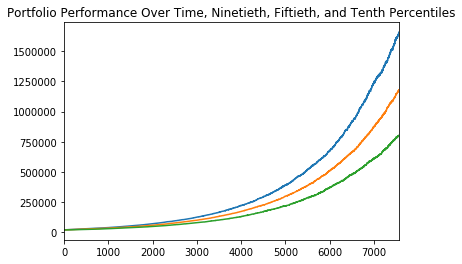

In [46]:
# Compute portfolio performance over time
plot_title = f"Portfolio Performance Over Time, Ninetieth, Fiftieth, and Tenth Percentiles"
result = portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T
portfolio_perf = plaid_initial * result
portfolio_perf.plot(legend=None, title=plot_title)
portfolio_perf
# Plot projected performance over time
# 0235 wed morning
# to do, make graphs, check numbers, download sql program
#plot_title = f"Simulations of Cumulative Portfolio Return Trajectories Over the Next Thirty Years, Ninetieth, Fiftieth, and Tenth Percentiles"
#final_cumul_ret_90.plot(legend=None, title=plot_title)
#result = portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T #to flip things, set axis equal to one portfol_cumul_ret.quantile([.9, .5, .1], axis=1).T
#result.plot(legend=None, title=plot_title)
#result



# 0743 wed NEED TO DOUBLE CHECK W ALL THEIR FILES TO ANSWER QUESTIONS!!!!